# **Another Kaggle Project**

The data set belongs to a leading online E-Commerce company (https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction). An online retail (E commerce) company wants to know the customers **who are going to churn**, so accordingly they can approach customer to offer some promos.</br>
**"Churn"** is a business term describing which customers leave or will stop paying for a product or service.

## **The Dataset**

In [1]:
# import some library we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wn
wn.filterwarnings('ignore')

In [2]:
xls = pd.ExcelFile('E Commerce Dataset.xlsx')
df = pd.read_excel(xls, sheet_name='E Comm') #read the file using pandas library
print('This is the sample data:\n')
df.head(5)

This is the sample data:



,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df['HourSpendOnApp'].mode()[0]

3.0

We'll do some exploration in our data, so we can know what is the best thing we can use and fix

## **EDA**

Exploratory Data Analysis (EDA) is an analyzing process to understand the characteristics of the data and things that we need to do so the data can be used for the model learning process.
When doing EDA, we need to know exactly:
 - the Distribution of our data and our target
 - the Preparation before we train our data to ML model
 - the Appropriate and important features

In [4]:
df.info() #Checking the dtype and if there are any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

As we can see, there are some columns that contains **null** value. And there are many **categorical** features, we can use this information to choose our model, later.

In [5]:
# Here we seperate any numerical and categorical value. 
# Even though there are some categorical feature that have numeric dtype, 
# we also can see the insight from it.
cats = df.select_dtypes(include=['object']).columns
nums = df.select_dtypes(exclude=['object']).columns
nums = nums.drop('CustomerID') #dropping this feature because iirelevant

We'll going to see some categorical feature, we'll check if there is redundant values in categorical feature.

In [6]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [7]:
for i in cats:
    print('{} values:'.format(i))
    print(df[i].unique())

PreferredLoginDevice values:
['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode values:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender values:
['Female' 'Male']
PreferedOrderCat values:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus values:
['Single' 'Divorced' 'Married']


As we can see here, there are some values that have the same meaning, for example in PreferredLoginDevice we have **"Mobile Phone"** == **"Phone"**, also PreferredPaymentMode we have **"Cash on Delivery"** == **"COD"** and **"Credit Card"** == **"CC"**.
We can fix this using feature engineering.

We're done checking categorical feature. We'll move to numerical feature

In [8]:
df[nums].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


If we look at our numerical features, there are several columns whose distribution looks **abnormal**, for example like WarehouseToHome feature, mean > median represents **Positive Skewed**. I will use **univariate analysis** to visualize the distribution of the data more detail.

In [9]:
df['Churn'].value_counts() # Checking our target to see if there is class imbalance

0    4682
1     948
Name: Churn, dtype: int64

As we can see there is **class imbalance** in our target. This will affect our model when learning the data. We can fix it using *imblearn* library later

### **Univariate Analysis**

Univariate Analysis is a process to analyze each column separately, looking at data distribution in detail. 

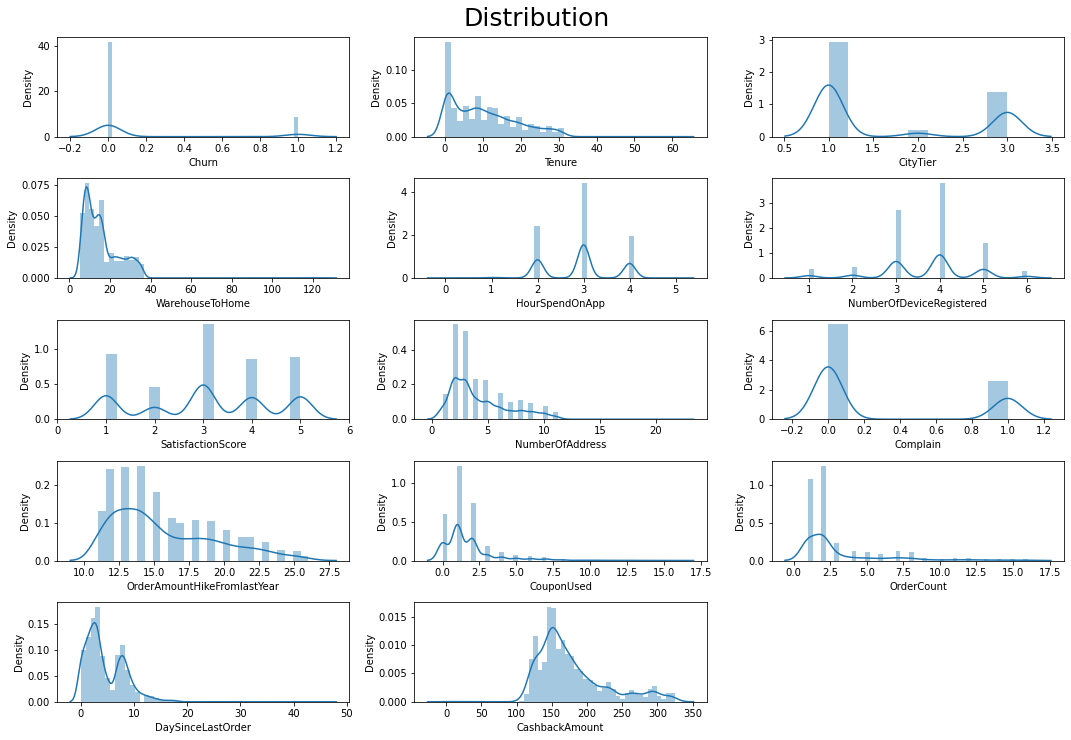

In [10]:
plt.figure(figsize=(15,12))

for i in range(0, len(nums)):
    plt.subplot(6,3,i+1)
    sns.distplot(x=df[nums[i]])
    plt.xlabel(nums[i])
plt.suptitle('Distribution', fontsize=25)
plt.tight_layout()

We can see almost all of the numerical features have abnormal distribution. We can use this information when we want to fill the null values and overcome the outlier.

Now let's see if there are many outliers in numerical features.

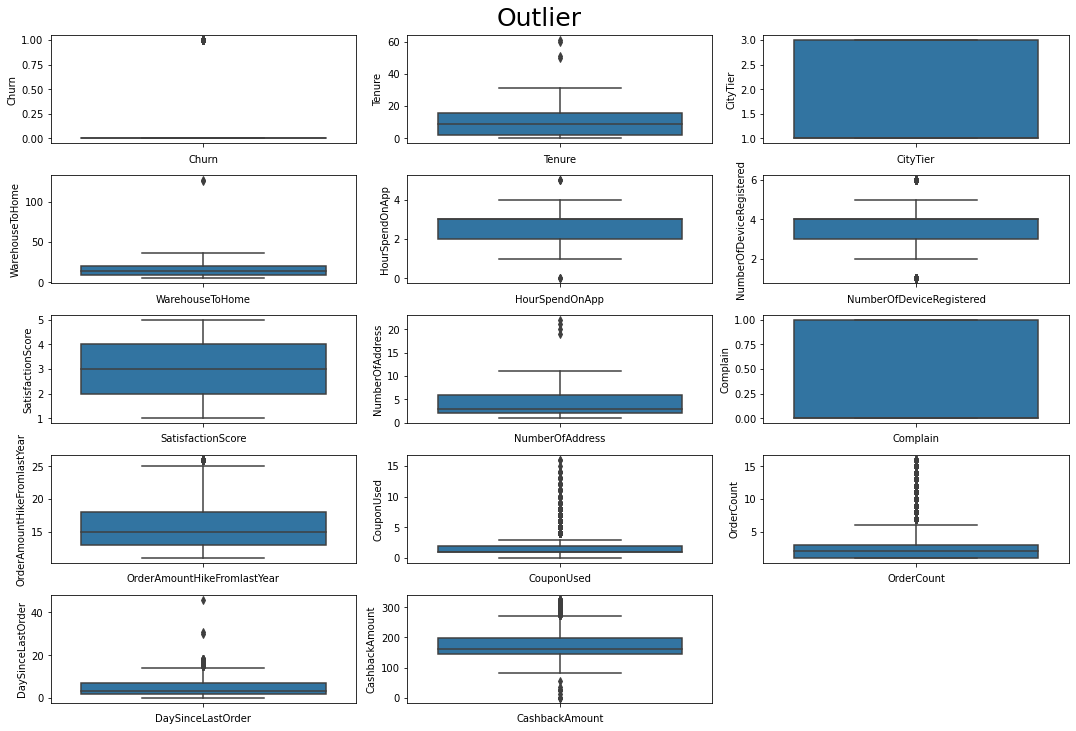

In [11]:
plt.figure(figsize=(15,12))

for i in range(0, len(nums)):
    plt.subplot(6,3,i+1)
    sns.boxplot(y=df[nums[i]])
    plt.xlabel(nums[i])
plt.suptitle('Outlier', fontsize=25)
plt.tight_layout()

Now if we look at the boxplot, we can see there are outliers in every numerical features. We can handle it using Z-score or IQR.</br>
**But**, since we have small size of data we will have 2 results analysis, with and without oultiers. If we look closely, the outliers can still happen in real life and also make sense. For example, 15 order count still make sense in real world. So, later we will have 2 results.

## **Multivariate Analysis**

Multivariate Analysis is a process to analyze multiple feature at once to find relationships between feature

Here, we will only use the correlation heatmap to see the correlation between features and find any redundant values (if correlation value > 0.7, there is a chance that the feature is redundant)

<AxesSubplot:>

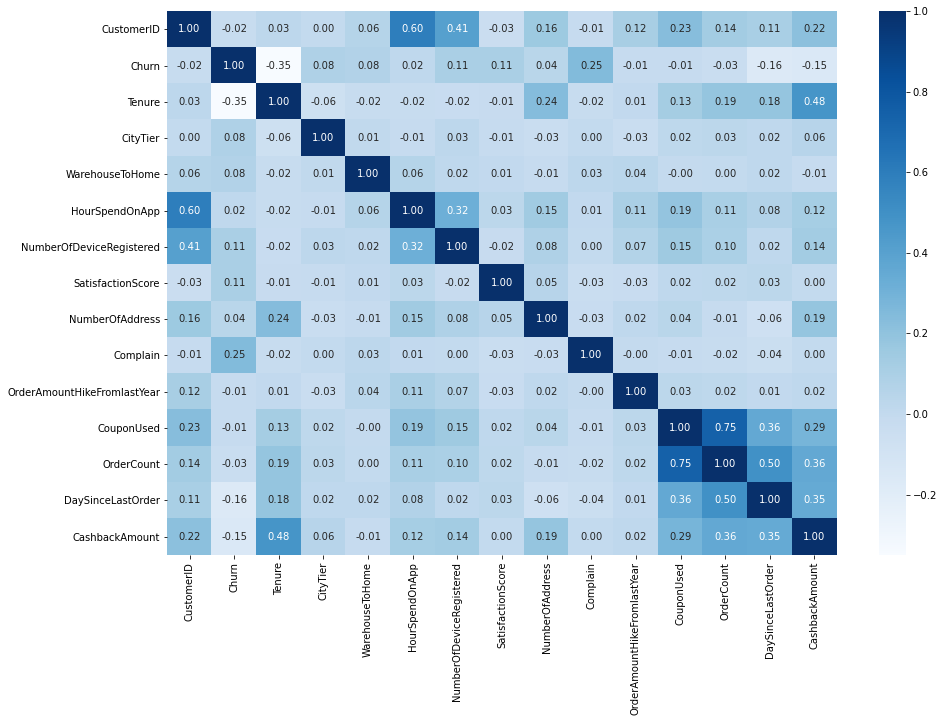

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues', fmt='.2f')

As we can see, there is one value that have a chance to be redundant feature. This give us information to drop this feature if our model give a bad result when predicting the data.

I will use the correlation heatmap after I do Data Pre-processing to see if there are any kind of linear correlation with our target that can help us to choose our feature wisely.

## **Data Pre-processing**

After knowing the data, the next step is processing the data so when it is entered into the model it does not produce "garbage", remember-- **Garbage in Garbage Out** . The first step to handle is null values, move to duplicate values, redundant (I will try to drop it after see the evaluation score), outliers, encoding, Normalization/Standardization and class imbalance.

#### 1. Null values

In [13]:
df_pre = df.drop(columns=['CustomerID']) # drop irrrelevant feature
df_pre.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

There are 6 numerical and 1 categorical features that have null values. I will fill it with median because the distribution of the data is not normal.

In [14]:
df_pre['Tenure'].fillna(value=df_pre['Tenure'].median(), inplace=True)
df_pre['WarehouseToHome'].fillna(value=df_pre['WarehouseToHome'].median(), inplace=True)
df_pre['HourSpendOnApp'].fillna(value=df_pre['HourSpendOnApp'].mode()[0], inplace=True)
df_pre['OrderAmountHikeFromlastYear'].fillna(value=df_pre['OrderAmountHikeFromlastYear'].median(), inplace=True)
df_pre['CouponUsed'].fillna(value=df_pre['CouponUsed'].median(), inplace=True)
df_pre['OrderCount'].fillna(value=df_pre['OrderCount'].median(), inplace=True)
df_pre['DaySinceLastOrder'].fillna(value=df_pre['DaySinceLastOrder'].median(), inplace=True)
df_pre.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

The null value already gone. Now let's check duplicated data

#### 2. Duplicated Data

Duplicated data will impact our model. So, we can drop this duplicated data using drop_duplicates function.</br>
We can check first using .duplicated().sum() function.

In [15]:
df_pre.duplicated().sum()

558

As we can see here, there is 558 duplicate value.

In [16]:
df_pre.drop_duplicates(inplace=True)
df_pre.duplicated().sum()

0

Duplicated Data already gone...

#### 3. Outliers

Outliers sometimes impact our machine learning model from learning our data because it has unusual (much different range value) value than other value. Recall from our univariate analysis using boxplot, there is a lot of features that have outliers. </br>
As I had explain in EDA step, we will have 2 kind of result, with and without outliers. 

In [17]:
#dropping categorical value that have numeric dtytpe
nums = nums.drop(['Churn','CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain'])
nums

Index(['Tenure', 'WarehouseToHome', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Before dropping the outliers, I drop all categorical feature that have integer data type. It is because for categorical feature, there is **no concept of outliers**.

In [18]:
print('Before: ', len(df_pre))
feature_check = np.array([True]*len(df_pre))

for i in nums:
    Q1 = df_pre[i].quantile(0.25)
    Q3 = df_pre[i].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1-(1.5*IQR)
    high_limit = Q3+(1.5*IQR)
    feature_check = ((df_pre[i] >= low_limit) & (df_pre[i] <= high_limit)) & feature_check

df_pre_drop = df_pre[feature_check]
print('After: ', len(df_pre_drop))

Before:  5072
After:  3805


Now, we have 2 kind of data, df_pre = with outliers and df_pre_drop = without outliers

#### 4. Changing few categorical feature

Recall that there are several values that have the same meaning, like this:

In [19]:
df_pre['PreferredPaymentMode'].value_counts()

Debit Card          2098
Credit Card         1348
E wallet             562
UPI                  360
COD                  322
CC                   248
Cash on Delivery     134
Name: PreferredPaymentMode, dtype: int64

I will handle this error by choosing one value and replacing the redundant value with it.

In [20]:
# Data With outliers
df_pre['PreferredPaymentMode'] = df_pre['PreferredPaymentMode'].replace(['COD','CC'],['Cash on Delivery','Credit Card'])
df_pre['PreferredLoginDevice'] = df_pre['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df_pre['PreferedOrderCat'] = df_pre['PreferedOrderCat'].replace('Mobile','Mobile Phone')

# Data Without outliers
df_pre_drop['PreferredPaymentMode'] = df_pre_drop['PreferredPaymentMode'].replace(['COD','CC'],['Cash on Delivery','Credit Card'])
df_pre_drop['PreferredLoginDevice'] = df_pre_drop['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df_pre_drop['PreferedOrderCat'] = df_pre_drop['PreferedOrderCat'].replace('Mobile','Mobile Phone')

In [21]:
df_pre['PreferredPaymentMode'].value_counts()

Debit Card          2098
Credit Card         1596
E wallet             562
Cash on Delivery     456
UPI                  360
Name: PreferredPaymentMode, dtype: int64

Now we have reduced all value of the categorical features. Let's move on to Feature Encoding.

#### 5. Feature Encoding

Changing all categorical feature to numeric so machine can easily learn the pattern. I will use label encoding and One-hot encoding. I use this 2 encoding funtion, Label encoding used if there are only 2 **unique** values in one feature. Otherwise, we use One-hot encoding.

In [22]:
df_pre['MaritalStatus'].value_counts()

Married     2672
Single      1552
Divorced     848
Name: MaritalStatus, dtype: int64

In [23]:
# Data With outliers
df_pre['Gender'] = df_pre["Gender"].astype('category').cat.codes
df_pre['PreferredLoginDevice'] = df_pre["PreferredLoginDevice"].astype('category').cat.codes
dummy_PreferredPaymentMode = pd.get_dummies(df_pre['PreferredPaymentMode'], prefix='is')
dummy_PreferedOrderCat = pd.get_dummies(df_pre['PreferedOrderCat'], prefix='is')
dummy_MaritalStatus = pd.get_dummies(df_pre['MaritalStatus'], prefix='is')
df_pre = df_pre.join(dummy_PreferredPaymentMode)
df_pre = df_pre.join(dummy_PreferedOrderCat)
df_pre = df_pre.join(dummy_MaritalStatus)

# Data Without outliers
df_pre_drop['Gender'] = df_pre_drop["Gender"].astype('category').cat.codes
df_pre_drop['PreferredLoginDevice'] = df_pre_drop["PreferredLoginDevice"].astype('category').cat.codes
dummy_PreferredPaymentMode_drop = pd.get_dummies(df_pre_drop['PreferredPaymentMode'], prefix='is')
dummy_PreferedOrderCat_drop = pd.get_dummies(df_pre_drop['PreferedOrderCat'], prefix='is')
dummy_MaritalStatus_drop = pd.get_dummies(df_pre_drop['MaritalStatus'], prefix='is')
df_pre_drop = df_pre_drop.join(dummy_PreferredPaymentMode_drop)
df_pre_drop = df_pre_drop.join(dummy_PreferedOrderCat_drop)
df_pre_drop = df_pre_drop.join(dummy_MaritalStatus_drop)

In [24]:
df_pre.drop(columns=['PreferredLoginDevice','Gender','PreferredPaymentMode','PreferedOrderCat','MaritalStatus'], inplace=True)
df_pre_drop.drop(columns=['PreferredLoginDevice','Gender','PreferredPaymentMode','PreferedOrderCat','MaritalStatus'], inplace=True)

#### 6. Normalization/Standardization

I only use Normalization because the data distribution doesn't have Gaussian distribution (not normal).

In [25]:
from sklearn.preprocessing import MinMaxScaler

for i in nums:
    df_pre[i+'_Norm'] = MinMaxScaler().fit_transform(df_pre[i].values.reshape(len(df_pre),1))
    df_pre_drop[i+'_Norm'] = MinMaxScaler().fit_transform(df_pre_drop[i].values.reshape(len(df_pre_drop),1))

In [26]:
#drop the unused columns
df_pre.drop(columns=list(nums), inplace=True) 
df_pre_drop.drop(columns=list(nums), inplace=True)
df_pre.columns

Index(['Churn', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'Complain', 'is_Cash on Delivery',
       'is_Credit Card', 'is_Debit Card', 'is_E wallet', 'is_UPI',
       'is_Fashion', 'is_Grocery', 'is_Laptop & Accessory', 'is_Mobile Phone',
       'is_Others', 'is_Divorced', 'is_Married', 'is_Single', 'Tenure_Norm',
       'WarehouseToHome_Norm', 'NumberOfAddress_Norm',
       'OrderAmountHikeFromlastYear_Norm', 'CouponUsed_Norm',
       'OrderCount_Norm', 'DaySinceLastOrder_Norm', 'CashbackAmount_Norm'],
      dtype='object')

#### 7. Class Imbalance

Recall when we check our target, there is a class imbalance. We can fix this using *over_sampling* tools 

In [27]:
from imblearn import over_sampling

X = df_pre.drop(columns=['Churn']) # I try not to drop column to see if there are any impact on my model
y = df_pre['Churn'].values

X_drop = df_pre_drop.drop(columns=['Churn'])
y_drop = df_pre_drop['Churn'].values

X_Rsampler, y_Rsampler = over_sampling.RandomOverSampler(random_state=18).fit_resample(X,y)
X_drop_Rsampler, y_drop_Rsampler = over_sampling.RandomOverSampler(random_state=18).fit_resample(X_drop,y_drop)
print('Check data with Outliers:\n',pd.Series(y_Rsampler).value_counts())
print('Check data without Outliers:\n',pd.Series(y_drop_Rsampler).value_counts())

Check data with Outliers:
 0    4231
1    4231
dtype: int64
Check data without Outliers:
 0    3139
1    3139
dtype: int64


Now, we have balance target. Let's try to build our model

## **Train Model**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def model_validation(X_train, y_train, X_test, y_true,y_pred, model):
    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_true,y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(y_true,y_pred)))
    print('Recall Score: {:.2f}'.format(recall_score(y_true,y_pred)))
    print('Train Score: {:.2f}'.format(model.score(X_train, y_train)))
    print('Test Score: {:.2f}'.format(model.score(X_test, y_true)))

In [29]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_Rsampler, y_Rsampler, test_size=0.3, random_state=18)
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop_Rsampler, y_drop_Rsampler, test_size=0.3, random_state=18)
print('Train with outlier: ', len(y_train))
print('Train without outlier: ', len(y_drop_train))
print('Test with outlier: ', len(y_test))
print('Test without outlier: ', len(y_drop_test))

Train with outlier:  5923
Train without outlier:  4394
Test with outlier:  2539
Test without outlier:  1884


Even though our data shows no linear relationship when we use heatmap, we will still use Logistic Regression as baseline. 

### **Logistic Regression**

##### With Outliers

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred, lr_model)

Accuracy Score: 0.80
Precision Score: 0.80
Recall Score: 0.80
Train Score: 0.81
Test Score: 0.80


##### Without Outliers

In [31]:
lr_model.fit(X_drop_train, y_drop_train)

y_drop_pred = lr_model.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred, lr_model)

Accuracy Score: 0.83
Precision Score: 0.84
Recall Score: 0.82
Train Score: 0.81
Test Score: 0.83


As we can see from the result above, data with outliers shows no signs of underfitting, while data without outliers show signs of underfitting (test score > train score). I will try use hyperparameter tuning to see if this case still happend.

#### Hyperparameter Tuning

##### With Outliers

In [32]:
penalty = ['l1','l2','elasticnet']
C = [0.0001, 0.001, 0.002]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty = penalty, C=C, solver=solver)

lr_model_tuning = LogisticRegression()
best_model_lr = RandomizedSearchCV(lr_model_tuning, hyperparameters, cv=5, random_state=18, scoring='recall')
best_model_lr.fit(X_train,y_train)

y_pred_tuning = best_model_lr.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred_tuning, best_model_lr)

Accuracy Score: 0.60
Precision Score: 0.56
Recall Score: 0.93
Train Score: 0.94
Test Score: 0.93


##### Without Outliers

In [33]:
best_model_lr.fit(X_drop_train, y_drop_train)

y_drop_pred_tuning = best_model_lr.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred_tuning, best_model_lr)

Accuracy Score: 0.60
Precision Score: 0.56
Recall Score: 0.96
Train Score: 0.96
Test Score: 0.96


In [34]:
print(best_model_lr.best_params_) #print the best hyperparaameter for this model

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.0001}


Now, we get our baseline. Let's try another model.

### **KNN**

One of the simplest algorithms to perform classification

##### With Outliers

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred_knn, knn_model)

Accuracy Score: 0.86
Precision Score: 0.82
Recall Score: 0.94
Train Score: 0.92
Test Score: 0.86


##### Without Outliers

In [36]:
knn_model.fit(X_drop_train, y_drop_train)

y_drop_pred_knn = knn_model.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred_knn, knn_model)

Accuracy Score: 0.86
Precision Score: 0.81
Recall Score: 0.96
Train Score: 0.92
Test Score: 0.86


Both of the model seems overfitting, we should try tuning the hyperparameter

#### Hyperparameter Tuning

##### With Outliers

In [37]:
n_neighbors = list(range(1,30))
p = [1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameter = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn_model_tuning = KNeighborsClassifier()
best_model_knn = RandomizedSearchCV(knn_model_tuning, hyperparameter, cv=5, random_state=18, scoring='recall')
best_model_knn.fit(X_train, y_train)

y_pred_knn_tuning = best_model_knn.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred_knn_tuning, best_model_knn)

Accuracy Score: 0.90
Precision Score: 0.86
Recall Score: 0.97
Train Score: 0.99
Test Score: 0.97


##### Without Outliers

In [38]:
best_model_knn.fit(X_drop_train, y_drop_train)

y_drop_pred_knn_tuning = best_model_knn.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred_knn_tuning, best_model_knn)

Accuracy Score: 0.89
Precision Score: 0.84
Recall Score: 0.98
Train Score: 0.99
Test Score: 0.98


KNN model already give us the best model, so far...

Let's try our last basic and interpretable classification model, Decision Tree

### **Decision Tree**

With Outliers

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_knn = dt_model.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred_knn, dt_model)

Accuracy Score: 0.98
Precision Score: 0.96
Recall Score: 1.00
Train Score: 1.00
Test Score: 0.98


Without Outliers

In [40]:
dt_model.fit(X_drop_train, y_drop_train)

y_drop_pred_knn = dt_model.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred_knn, dt_model)

Accuracy Score: 0.98
Precision Score: 0.96
Recall Score: 0.99
Train Score: 1.00
Test Score: 0.98


Both model seems good, try hyperparameter to find the best model result.

#### Hyperparameter Tuning

With outliers

In [48]:
criterion = ['gini','entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(1,150, num=30)]
min_samples_split = [2,5,10,25,50,75,100]
min_samples_leaf = [1,5,10,25,50]
hyperparameter = dict(criterion=criterion, splitter=splitter,max_depth=max_depth , min_samples_split=min_samples_split, 
                      min_samples_leaf=min_samples_leaf)

dt_model_tuning = DecisionTreeClassifier()
best_model_dt = RandomizedSearchCV(dt_model_tuning, hyperparameter, cv=5, random_state=18, scoring='recall')
best_model_dt.fit(X_train, y_train)

y_pred_dt_tuning = best_model_dt.predict(X_test)
model_validation(X_train, y_train, X_test, y_test, y_pred_dt_tuning, best_model_dt)

Accuracy Score: 0.97
Precision Score: 0.96
Recall Score: 0.99
Train Score: 1.00
Test Score: 0.99


In [49]:
best_model_dt.fit(X_drop_train, y_drop_train)

y_drop_pred_dt_tuning = best_model_dt.predict(X_drop_test)
model_validation(X_drop_train, y_drop_train, X_drop_test, y_drop_test, y_drop_pred_dt_tuning, best_model_dt)

Accuracy Score: 0.97
Precision Score: 0.96
Recall Score: 0.99
Train Score: 1.00
Test Score: 0.99


In [50]:
print(best_model_dt.best_params_)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'entropy'}


We don't need to use bagging or boosting method because our model already shows good result.

We can use any classification algorithm here. But, we also need to tune the hyperparameter for better result. We can choose the basic or complicated algorithm. For me I will choose Decision Tree because it is easy to interpret the model. Clearly there's something more we can try. But I'll leave it here, thank you for seeing this project.